In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\xaiplanet\AppData\Local\Temp\ipykernel_12368\3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## PART5.데이터 사전처리 
### 1. 누락데이터처리
#### 누락데이터 확인, 제거, 치환 

#### 누락데이터 확인

In [32]:
import seaborn as sns

In [33]:
# titanic dataset 가져오기

df = sns.load_dataset('titanic')
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [35]:
df.shape

(891, 15)

In [36]:
# deck 열의 NaN 개수 계산하기

nan_deck = df['deck'].value_counts(dropna=False)
nan_deck

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [37]:
## 누락데이터를 직접적인 방법으로 찾기 : isnull() , notnull()
# isnull() : 누락 데이터일경우 : True , 유효한 데이터일 경우 : False 반환
# notnull() : 누락 데이터일경우 : False , 유효한 데이터일 경우 : True 반환

df.head().isnull()
# df.head().notnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [38]:
# 누락데이터 갯수 확인

# df.head().isnull()
# df.head().isnull().sum()
df.head().isnull().sum(axis=0) # axis=0 : 열기준으로 갯수 카운트 

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           3
embark_town    0
alive          0
alone          0
dtype: int64

#### 누락데이터 제거

In [39]:
# 누락데이터 확인

missing_df = df.isnull()

for col in missing_df.columns :
    missing_count = missing_df[col].value_counts()
    
    try :
        print(col,':',missing_count[True]) 
    except :
        print(col,':',0)

survived : 0
pclass : 0
sex : 0
age : 177
sibsp : 0
parch : 0
fare : 0
embarked : 2
class : 0
who : 0
adult_male : 0
deck : 688
embark_town : 2
alive : 0
alone : 0


In [59]:
# missing_df

In [60]:
# missing_df.columns

In [61]:
# missing_df['survived'].value_counts()

In [40]:
# 누락데이터 제거 

df_thresh = df.dropna(axis=1,thresh=500) 
df_thresh
# => df에서 null 값이 500개 이상인 열(axis=1)은 지우고 df_thresh 로 저장

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [62]:
# df_thresh.columns

In [41]:
# 891명의 승객중 age에 대한 데이터가 없는 177명에 대해, 모든 행 삭제 처리 

df_age = df.dropna(subset=['age'],how='any',axis=0)
df_age

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [12]:
# len(df_age)

#### 누락데이터 치환

NaN -> 평균값 or 최빈값 or 이웃하고 있는 값 으로 대체!

In [42]:
df['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [43]:
# age 열의 NaN 값을 다른 나이 데이터의 평균으로 변경하기 

mean_age = df['age'].mean(axis=0)
print(mean_age)

29.69911764705882


In [44]:
df['age'].fillna(mean_age, inplace=True)
df['age'].head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64

In [46]:
# 누락데이터 확인

missing_df = df.isnull()

for col in missing_df.columns :
    missing_count = missing_df[col].value_counts()
    
    try :
        print(col,':',missing_count[True]) 
    except :
        print(col,':',0)

survived : 0
pclass : 0
sex : 0
age : 0
sibsp : 0
parch : 0
fare : 0
embarked : 2
class : 0
who : 0
adult_male : 0
deck : 688
embark_town : 2
alive : 0
alone : 0


In [47]:
## age 의 누락 데이터는 처리 되었음
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [48]:
# embark_town 의 nan값처리하기 

df['embark_town'][825:830]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object

In [18]:
# embark_town 에서 가장 많이 count 된 것이 무엇인지 확인 

most_freq = df['embark_town'].value_counts(dropna=True).idxmax()
most_freq

'Southampton'

In [19]:
# embark_town 의 nan 값을 Southampthon 으로 대체해줌 

df['embark_town'].fillna(most_freq, inplace=True)
df['embark_town'][829]

'Southampton'

In [22]:
import pandas as pd

# cf.데이터셋 중에서 누락 데이터가 NaN으로 표시 되어 있지 않는 경우
# 보통 '-' 또는 '?' 같은 값으로 입력 되어 있기도 하다

data = {'first_column':  ['a', 'b'],
        'second_column': ['d', '?']
        }

df_ex = pd.DataFrame(data)
df_ex

,first_column,second_column
0,a,d
1,b,?


In [24]:
import numpy as np

# ex. '?' 를 np.nan 으로 치환

df_ex.replace('?', np.nan, inplace=True)
df_ex

,first_column,second_column
0,a,d
1,b,NaN


In [49]:
# 데이터셋의 특성상 서로 이웃하고 있는 데이터끼리 유사성을 가질 때는
# 앞이나 뒤에서 이웃하고 있는 값으로 치환해 주는 것이 좋음 

df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [50]:
# embarked 열의 누락 데이터수 합계
df['embarked'].isnull().sum()

2

In [51]:
df['embark_town'][825:830]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object

In [52]:
# embark_town열의 829값을 바로 앞에 있는 828행의 값으로 변경하기 
df['embark_town'].fillna(method='ffill',inplace=True)
df['embark_town'][825:830]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829     Queenstown
Name: embark_town, dtype: object

### 2. 중복 데이터 처리 
#### 중복 데이터 확인

In [55]:
import pandas as pd 

# 중복 데이터를 갖는 데이터 프레임을 만들기
df = pd.DataFrame({'c1':['a','a','b','a','b'],
                   'c2':[1,1,1,2,2],
                   'c3':[1,1,2,2,2]})

In [56]:
df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [58]:
# 데이터프레임 전체 행 데이터 중에서 중복값 찾기
df_dup = df.duplicated()
df_dup

# =>이전 행과 비교해서 같은 값이 나오는지 

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [60]:
col_dup = df['c2'].duplicated()
col_dup

# => c2열에 대해서만 이전 행과 비교해서 같은 값이 나오는지 확인 

0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool

#### 중복 데이터 제거

In [61]:
df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [62]:
# 데이터 프레임에서 중복 행 제거 

df2 = df.drop_duplicates()
df2

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [63]:
# drop_duplicates() 의 subset 옵션에 열이름의 리스트를 전달 하여 
# 데이터의 중복 여부를 판단할 때 subset 옵션에 해당하는 열을 기준으로 판단.

df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [64]:
df3 = df.drop_duplicates(subset=['c2','c3'])
df3

# => df에서 c2,c3열을 기준으로 중복되는 값 0,1 행과 3,4행중 두번쨰 중복값이 제거되고 0,3 행만 남음.

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2


### 3.데이터 표준화 
#### 단위 환산

In [3]:
# https://archive.ics.uci.edu/ml/datasets/auto+mpg 에서 데이터셋 다운받기 

import pandas as pd
import re

df = pd.read_csv('data/auto-mpg.csv', header=None, delimiter=r"\s+")
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [4]:
# 열 이름지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

In [5]:
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320


In [6]:
# mpg (mile per gallon)를 kpl(kilometer per liter)로 변환 (mpg_to_kpl = 0.425)
mpg_to_kpl = 1.60934 / 3.78541
mpg_to_kpl

0.42514285110463595

In [7]:
# mpg 열에 0.425를 곱한 결과를 새로운 열(kpl)에 추가 
df['kpl'] = df['mpg'] * mpg_to_kpl
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.652571
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.377143
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.652571


In [8]:
# kpl 열을 소수점 아래 둘째자리에서 반올림 
df['kpl'] = df['kpl'].round(2)
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.65


#### 자료형 변환

In [9]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
kpl             float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
 9   kpl           398 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 31.2+ KB


In [11]:
# 적절한 자료형 
# horsepower : 엔진출력 => 숫자형 
# model_year : 출시연도 => 숫자형 
# origin : 출신국가 => 범주형 

## horsepower는 숫자형으로 데이터가 구성되어있는데, 왜 object로 dtype 이 되어있는지?
## => 고유값 확인해보기 
df['horsepower'].unique()

## => 물음표 포함떄문에 object 로 표시 

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [13]:
# horsepower의 '?'값을 NaN으로 변경후
import numpy as np

df['horsepower'].replace('?', np.nan, inplace=True)
df['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393    86.00
394    52.00
395    84.00
396    79.00
397    82.00
Name: horsepower, Length: 398, dtype: object

In [87]:
# df.isnull().sum()

In [14]:
# NaN값이 들어있는 모든 행을 삭제한다.

df.dropna(subset=['horsepower'], axis=0, inplace=True)
df.shape

(392, 10)

In [15]:
df['horsepower'].dtype

dtype('O')

In [16]:
df['horsepower'] = df['horsepower'].astype('float')
df['horsepower'].dtype

dtype('float64')

In [17]:
# origin 열의 고유값 확인 

df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [18]:
# df['origin']

In [19]:
# 정수형 데이터를 문자열 데이터로 변환 

df['origin'].replace({1:'USA',2:'EU',3:'JPN'}, inplace=True)
df['origin'].unique()

array(['USA', 'JPN', 'EU'], dtype=object)

In [20]:
# origin 열의 국가 이름은 문자열 데이터 object 인데, 
# 국가이름 3가지로 유한한 갯수로 반복적으로 나타날떄에는 범주형(category)데이터로 표현하는 것이 효율적임

df['origin'] = df['origin'].astype('category')

print(df['origin'].dtypes)
# df['origin'].dtypes

category


In [21]:
# cf. 범주형 -> 문자형 데이터 변경

df['origin'] = df['origin'].astype('str')
print(df['origin'].dtypes)

object


In [22]:
# model_year 열 
# 무작위로 3개만 추출

print(df['model year'].sample(3))

181    75
157    75
279    78
Name: model year, dtype: int64


In [23]:
# model_year 는 출시 년도를 뜻하기에 숫자형으로 남겨도 무방하지만, 숫사의 상대적인 큰 의미가 없기에 숫자형태의 범주형으로 표현하는 것이 적절 
# model_year 열의 정수형을 범주형으로 변환

df['model year'] = df['model year'].astype('category')
print(df['model year'].sample(3))

216    77
101    73
344    81
Name: model year, dtype: category
Categories (13, int64): [70, 71, 72, 73, ..., 79, 80, 81, 82]


CF. 참고자료 : 자료형태 https://horae.tistory.com/entry/%EB%B2%94%EC%A3%BC%ED%98%95%EC%88%98%EC%B9%98%ED%98%95%EC%9D%B4%EC%83%81%ED%98%95%EC%97%B0%EC%86%8D%ED%98%95%EB%AA%85%EB%AA%A9%ED%98%95%EC%88%9C%EC%84%9C%ED%98%95-%EC%A0%95%EB%A6%AC

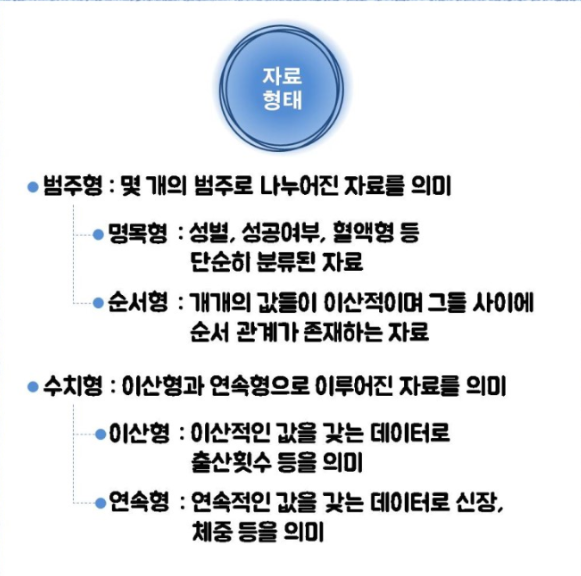

### 4. 범주형(카테고리) 데이터 처리
#### 구간분할

In [24]:
# 연속 데이터를 그대로 사용하기 보다는 일정한 구간으로 나눠서 분석하는 것이 효율적인 경우가 있다.
# 연속 변수를 일정 구간으로 나누고, 각 구간을 범주형 이산변수로 변환하는 과정을 구간분할(binning)이라고 함

## horsepower(엔진 출력)은 숫자로 표시하는 대신에 '저출력','보통출력','고출력' 으로 표시하는 것이 효율적일 수 있다.

## horsepower type 확인
df['horsepower'].dtype 

dtype('float64')

In [25]:
# np.histogram 함수로 3개의 bin으로 구분할 경계값 리스트 구하기 

count, bin_dividers = np.histogram(df['horsepower'],bins=3)
bin_dividers

array([ 46.        , 107.33333333, 168.66666667, 230.        ])

In [26]:
# 3개의 bin에 이름 지정

bin_names = ['저출력','보통출력','고출력']

In [30]:
# pd.cut 함수로 각 데이터를 3개의 bin에 할당

df['hp_bin'] = pd.cut(x = df['horsepower'], #데이터배열
                      bins = bin_dividers,  # 경계값 리스트
                      labels = bin_names,  # bin 이름
                      include_lowest = True) # 첫경계값 포함 


df['hp_bin']

0      보통출력
1      보통출력
2      보통출력
3      보통출력
4      보통출력
       ... 
393     저출력
394     저출력
395     저출력
396     저출력
397     저출력
Name: hp_bin, Length: 392, dtype: category
Categories (3, object): ['저출력' < '보통출력' < '고출력']

In [31]:
# horsepower 열, hp_bin 열의 첫 15행 출력 

df[['horsepower','hp_bin']].head(15)

,horsepower,hp_bin
0,130.0,보통출력
1,165.0,보통출력
2,150.0,보통출력
3,150.0,보통출력
4,140.0,보통출력
5,198.0,고출력
6,220.0,고출력
7,215.0,고출력
8,225.0,고출력
9,190.0,고출력


#### 더미변수

In [32]:
# 카테고리를 나타내는 범주형 데이터를 머신러닝 알고리즘에 바로 사용할 수 없음 
# => 컴퓨터가 인식 가능한 입력값으로 변환시켜 주어야 함 
# => 어떤 특성이 있고, 없고의 의미만 지님 1,0 (더미변수 (dummy variable), 원핫벡터) 로 표시 => 원핫인코딩

horsepower_dummies = pd.get_dummies(df['hp_bin'])
horsepower_dummies.head(15)

,저출력,보통출력,고출력
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [57]:
# sklearn 라이브러리를 이용하여 원핫인코딩 처리

from sklearn import preprocessing 

# 전처리를 위한 encoder 객체 만들기
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

# label encoder 로 문자열 범주를 숫자형 범주로 변환
onehot_labeled = label_encoder.fit_transform(df['hp_bin'].head(15))
print(type(onehot_labeled))
print(onehot_labeled)

<class 'numpy.ndarray'>
[1 1 1 1 1 0 0 0 0 0 0 1 1 0 2]


In [58]:
# 2차원 행렬로 변경 

onehot_reshaped = onehot_labeled.reshape(len(onehot_labeled),1)
print(type(onehot_reshaped))
print(onehot_reshaped)

<class 'numpy.ndarray'>
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]]


In [59]:
# 희소행렬로 변환 

onehot_fitted = onehot_encoder.fit_transform(onehot_reshaped)
print(type(onehot_fitted))
print(onehot_fitted)

# => (행, 열) 의 좌표와 값(1.0)의 형태로 정리됨 

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 0)	1.0
  (14, 2)	1.0


### 5. 정규화

In [60]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl,hp_bin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu,7.65,보통출력
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320,6.38,보통출력
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite,7.65,보통출력
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst,6.80,보통출력
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino,7.23,보통출력
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA,ford mustang gl,11.48,저출력
394,44.0,4,97.0,52.0,2130.0,24.6,82,EU,vw pickup,18.71,저출력
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA,dodge rampage,13.60,저출력
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA,ford ranger,11.90,저출력


In [62]:
#df['horsepower'].dtype

In [65]:
# horsepower 열의 통계 요약 정보로 최댓값(max) 확인

df.horsepower.describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [68]:
# df.horsepower.max()

In [70]:
# abs(df.horsepower.max())

In [66]:
# horsepower 열의 최댓값의 절댓값으로 모든 데이터를 나눠서 저장

df.horsepower = df.horsepower/abs(df.horsepower.max())
df.horsepower.head(3)

0    0.565217
1    0.717391
2    0.652174
Name: horsepower, dtype: float64

In [79]:
# df.horsepower.min()

In [80]:
# df.horsepower.max()

In [76]:
# horsepower 열의 최대값의 절대값으로 모든 데이터를 나눠서 저장

min_x = df.horsepower - df.horsepower.min()
min_max = df.horsepower.max() - df.horsepower.min()

df.horsepower = min_x / min_max
df.horsepower.head(3)

0    0.456522
1    0.646739
2    0.565217
Name: horsepower, dtype: float64

In [77]:
df.horsepower.describe()

count    392.000000
mean       0.317768
std        0.209191
min        0.000000
25%        0.157609
50%        0.258152
75%        0.434783
max        1.000000
Name: horsepower, dtype: float64